In [31]:
# YUVANSHANKAR AZHAGUMURUGAN
# IMPLEMENTED DECISION TREE CLASSIFIER IN PYTHON 
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [32]:
pd.read_csv("Iris.csv")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
train_df = pd.read_csv("Iris.csv").drop('Id',1)
train_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
train_df['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [35]:
train_df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [36]:

def label_replace(x):
    if x== 'Iris-setosa':
        return 0
    if x== 'Iris-versicolor':
        return 1
    if x== 'Iris-virginica':
        return 2

train_df['Species']=train_df['Species'].apply(lambda x : int(label_replace(x)))
train_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


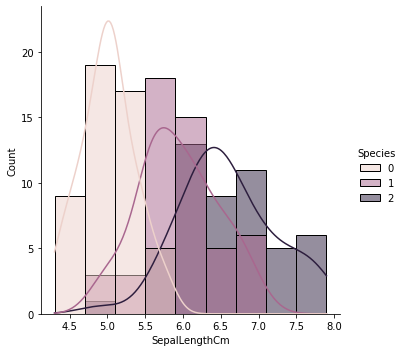

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(train_df, x="SepalLengthCm", hue= "Species",kde=True)

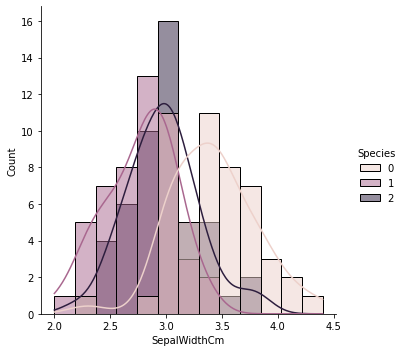

In [38]:
sns.displot(train_df, x="SepalWidthCm", hue= "Species",kde=True)

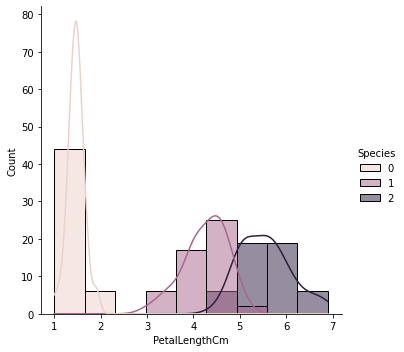

In [39]:
sns.displot(train_df, x="PetalLengthCm", hue= "Species",kde=True)

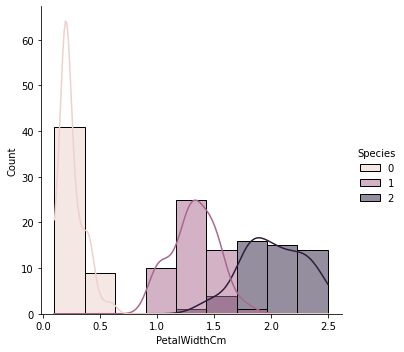

In [40]:
sns.displot(train_df, x="PetalWidthCm", hue= "Species",kde=True)

In [79]:
clf = DecisionTreeClassifier(max_depth=9)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Species',1),train_df['Species'],test_size=0.25)

In [81]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
clf.predict(X_test)

array([1, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2])

In [83]:
import numpy as np
np.array(y_test)

array([1, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2])

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(np.array(y_test),clf.predict(X_test))

0.9473684210526315

In [95]:
depth = []
accuracy = []
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth = i)
    X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Species',1), train_df['Species'], test_size = 0.25)
    clf.fit(X_train, y_train)
    depth.append(i)
    accuracy.append(accuracy_score(np.array(y_test), clf.predict(X_test)))
    print(i," ",accuracy_score(np.array(y_test), clf.predict(X_test)))

# accuracy decreases slightly after depth 5 prolly due to overfitting. Hence five is chosen as max depth

1   0.5789473684210527
2   0.9210526315789473
3   1.0
4   0.9473684210526315
5   0.9736842105263158
6   0.9210526315789473
7   0.8947368421052632
8   0.9473684210526315
9   0.9736842105263158


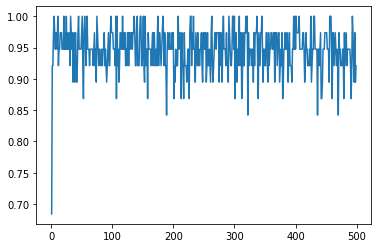

In [91]:
plt.plot(depth,accuracy)

[Text(279.0, 489.24, 'X[3] <= 1.75\ngini = 0.665\nsamples = 112\nvalue = [34, 38, 40]'),
 Text(186.0, 380.52000000000004, 'X[3] <= 0.8\ngini = 0.524\nsamples = 74\nvalue = [34, 38, 2]'),
 Text(93.0, 271.8, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(279.0, 271.8, 'X[2] <= 5.05\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]'),
 Text(186.0, 163.08000000000004, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(372.0, 163.08000000000004, 'X[0] <= 6.05\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(279.0, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(465.0, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(372.0, 380.52000000000004, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]')]

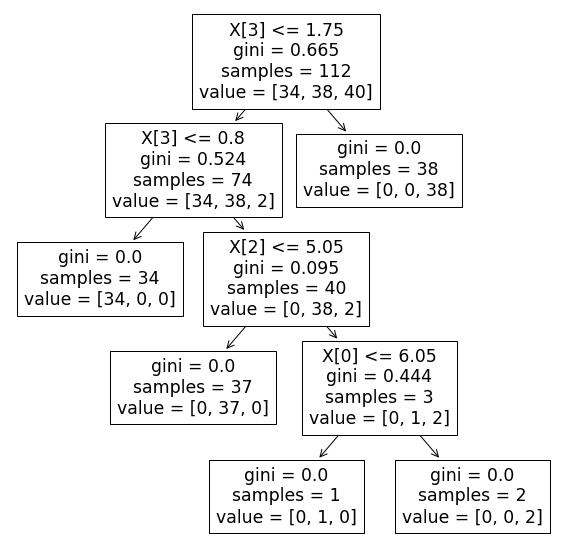

In [93]:
from sklearn import tree

fig=plt.figure(figsize=(10,10))
tree.plot_tree(clf)

[Text(1162.5, 2038.5, 'petal width (cm) <= 1.75\ngini = 0.665\nsamples = 112\nvalue = [34, 38, 40]\nclass = virginica'),
 Text(775.0, 1585.5, 'petal width (cm) <= 0.8\ngini = 0.524\nsamples = 74\nvalue = [34, 38, 2]\nclass = versicolor'),
 Text(387.5, 1132.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(1162.5, 1132.5, 'petal length (cm) <= 5.05\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]\nclass = versicolor'),
 Text(775.0, 679.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(1550.0, 679.5, 'sepal length (cm) <= 6.05\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(1162.5, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(1937.5, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(1550.0, 1585.5, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]\nclass = virginica')]

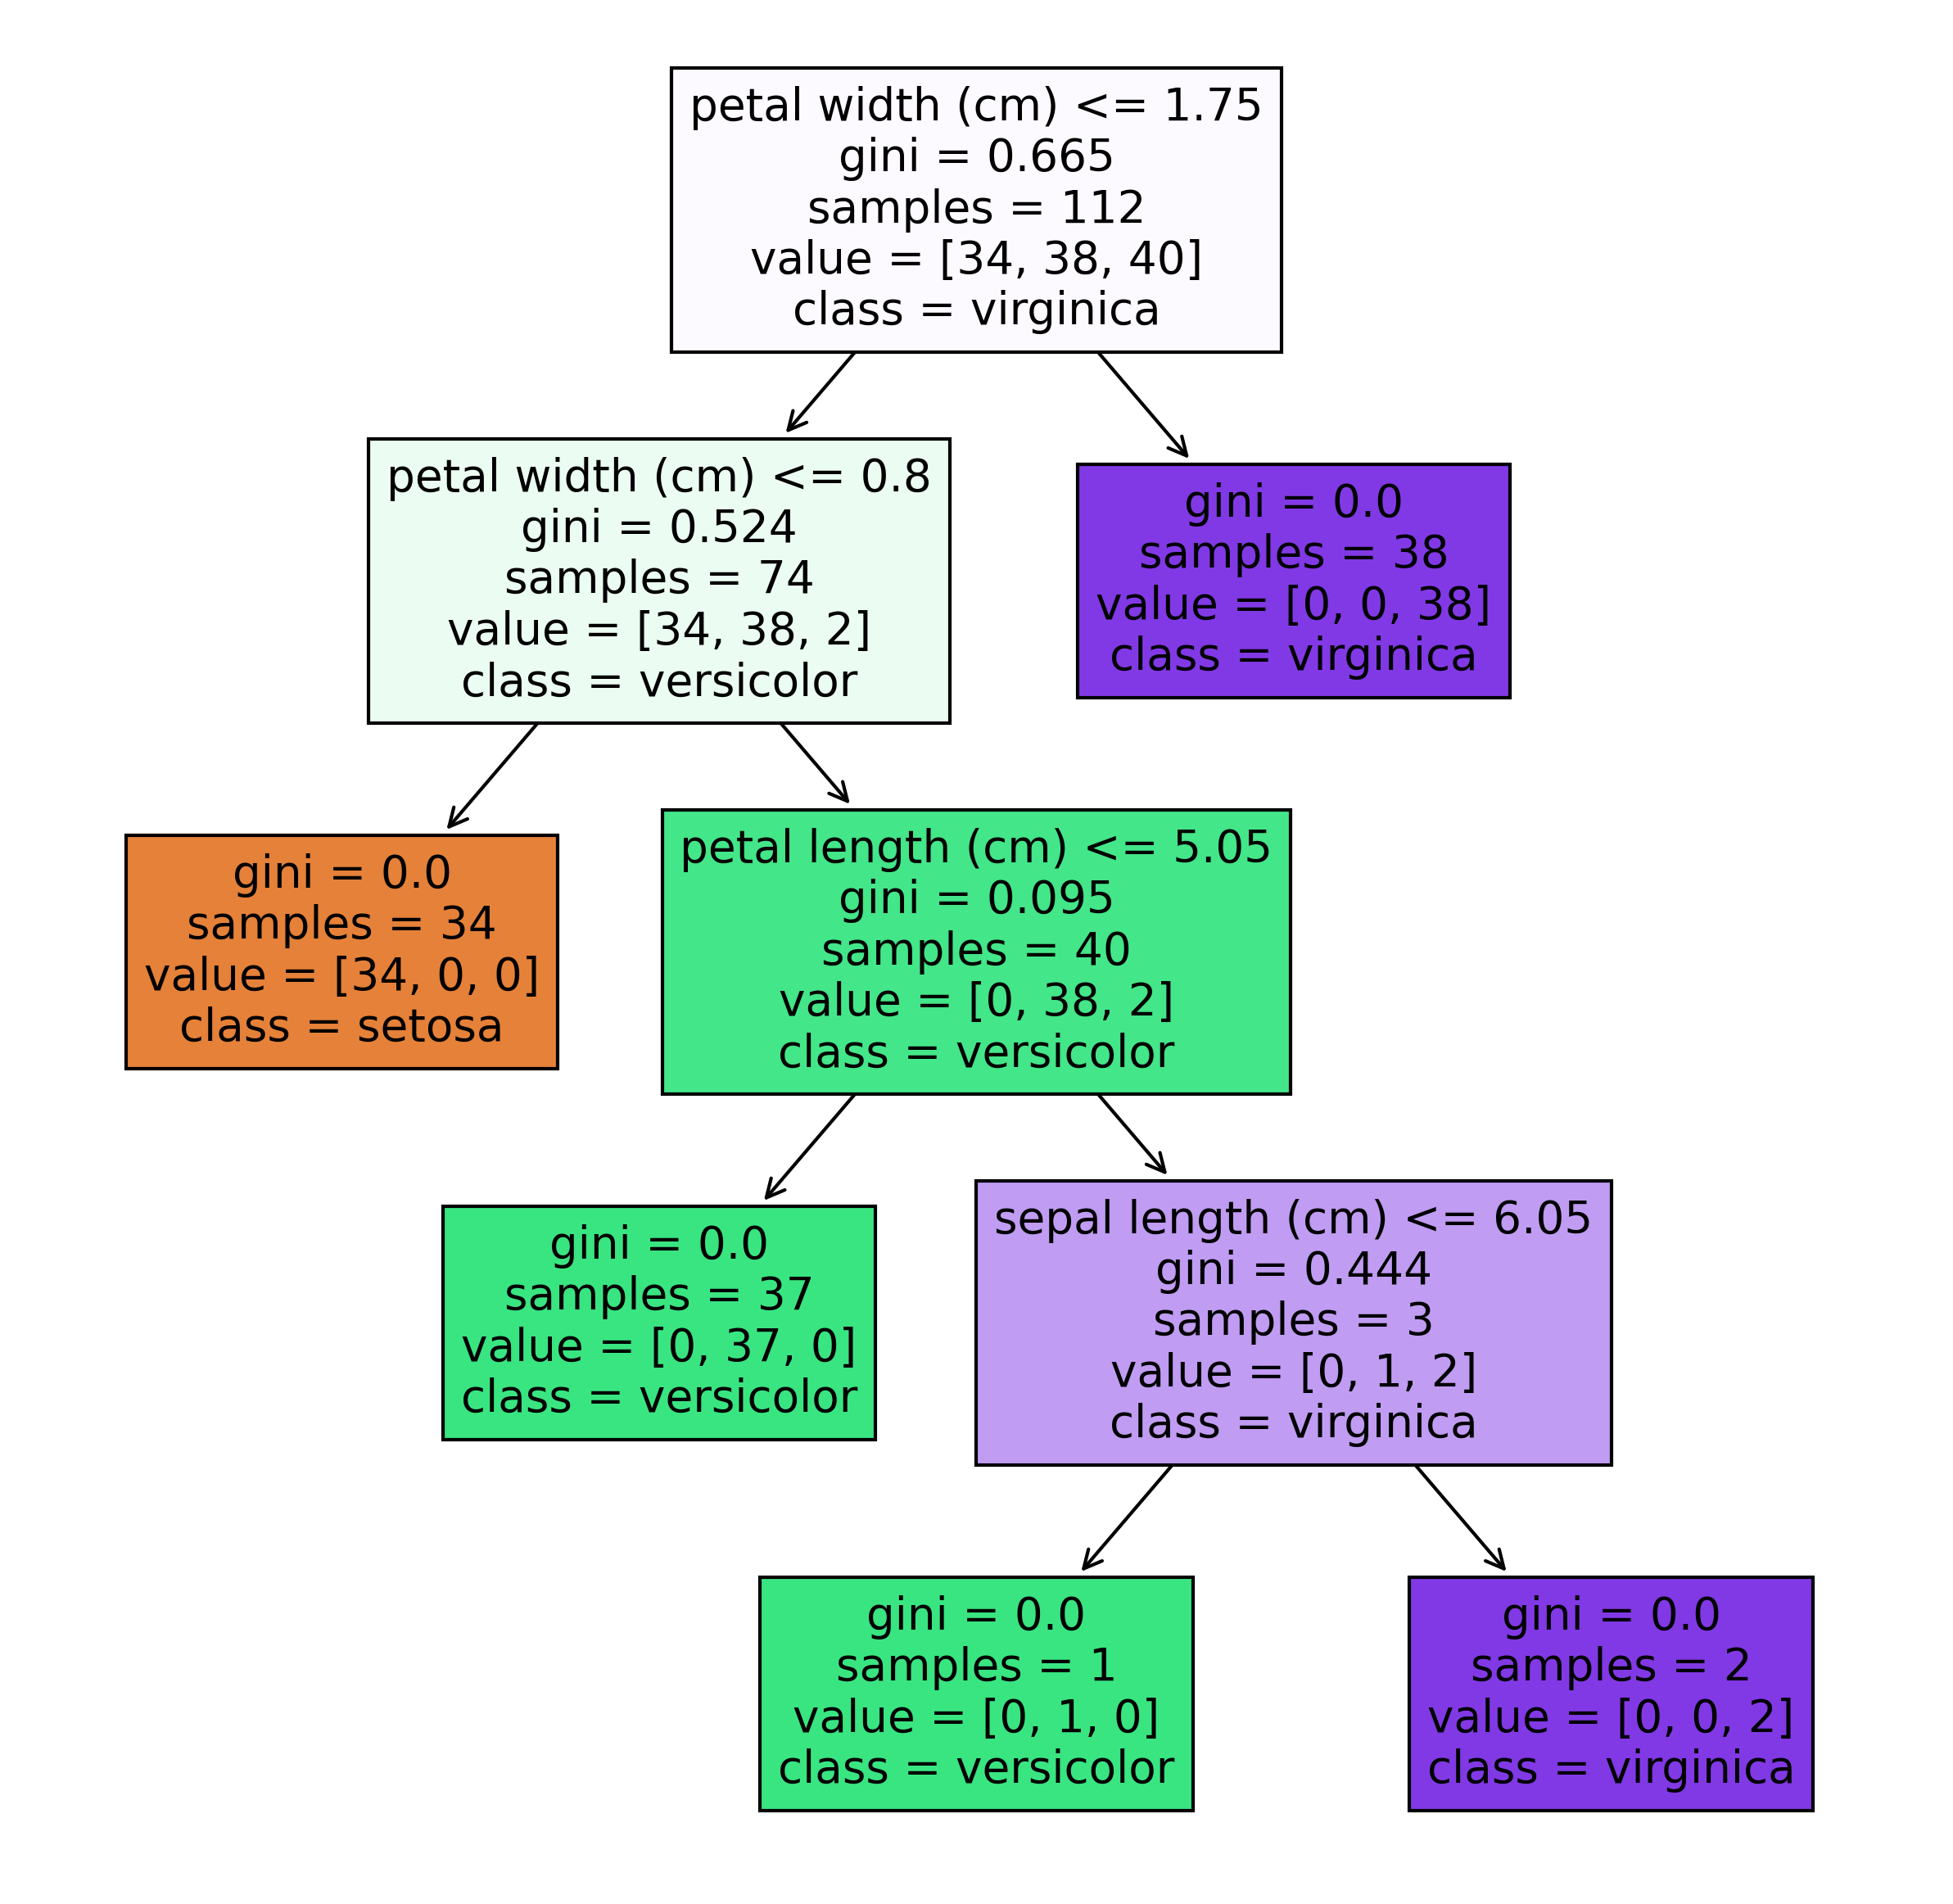

In [94]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True)